In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = [8, 5]

## NPHET IEMAG 2021-06-28 Model Scenario Projections vs Reported Data

This notebook compares the NPHET IEMAG 2021-06-28 model scenario projections with reported data, for 2021-07-01 to 2021-09-30. The projections are the mean values from Table 1 in the [2021-06--28 NPHET letter to the Minister for Health](https://assets.gov.ie/138789/3fe6b992-45e8-4a1c-b4c2-5e4a6131ad53.pdf).

Note:
* The focus is on cases only, as daily data are currently not provided for hospital admissions, ICU admissions, and deaths. These will be included when they are available again.

<img src="figures/20210628_nphet_letter_table1.png" alt="2021-06-28 NPHET Letter - Table 1" width="60%">

### Load the reported case data

In [3]:
casesdf = pd.read_csv('./data/reportedcases.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
casesdf.Cases = casesdf.Cases.cumsum()
casesdf['Scenario'] = 'Reported'

### Scenario data 2021-07-01 to 2021-09-30, based on Table 1 above

In [4]:
scenario_dates = pd.date_range('2021-07-01', '2021-09-30')
scenario_cases = [21000, 81000, 187000, 408000, 681000] * len(scenario_dates)
scenarios = ['No Delta', 'Optimistic', 'Central 1', 'Central 2', 'Pessimistic'] * len(scenario_dates)
scenariodf = pd.DataFrame({'Date': np.repeat(scenario_dates, 5), 'Scenario': scenarios, 'Cases': scenario_cases})

### NPHET scenarios vs reported cases

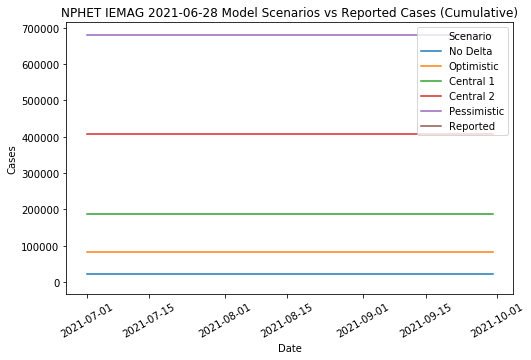

In [5]:
ax = sns.lineplot(data=pd.concat((scenariodf, casesdf), ignore_index=True), x='Date', y='Cases', hue='Scenario')
ax.set_title('NPHET IEMAG 2021-06-28 Model Scenarios vs Reported Cases (Cumulative)')
plt.legend(loc='upper right')
plt.xticks(rotation=30);
plt.savefig('./figures/nphet20210628scenarios_vs_reported_cases.png', bbox_inches="tight")